# Image compression using SVD

In [ ]:

# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



In [ ]:
# The sharable Link
link = 'https://drive.google.com/file/d/1fvM1QJt75e1rNG0C4AMfos1aJd7cXtIU'

# Get id from link
fluff, id = link.split('d/')
print (id)

# Get File from Gdrive
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('test.jpg')

1fvM1QJt75e1rNG0C4AMfos1aJd7cXtIU


Size(dimension):  (6000, 4000)


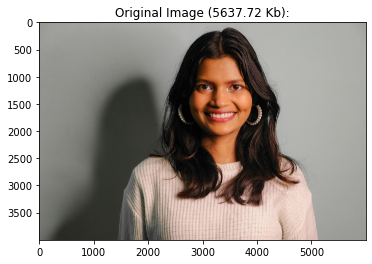

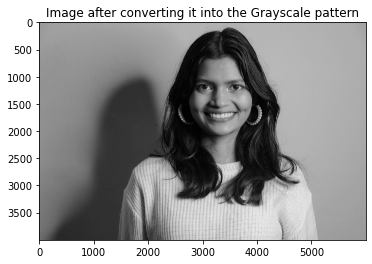

After compression: 


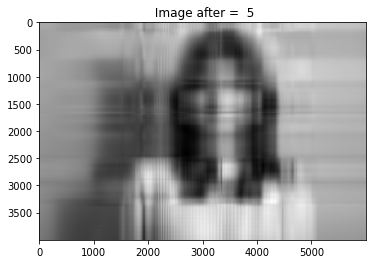

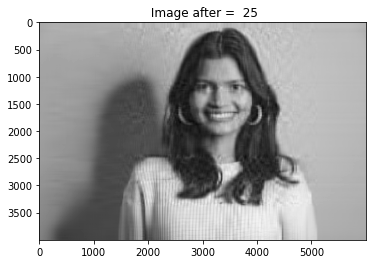

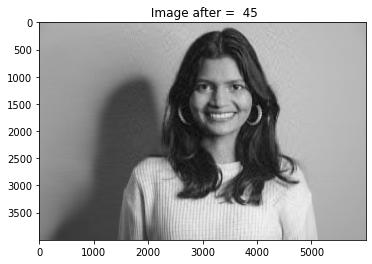

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

path = 'test.jpg'
img = Image.open(path)
s = float(os.path.getsize(path))/1000
print("Size(dimension): ",img.size)
plt.title("Original Image (%0.2f Kb):" %s)
plt.imshow(img)

imggray = img.convert('LA')
imgmat = np.array( list(imggray.getdata(band = 0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure()
plt.imshow(imgmat, cmap = 'gray')
plt.title("Image after converting it into the Grayscale pattern")
plt.show()

print("After compression: ")
U, S, Vt = np.linalg.svd(imgmat) #single value decomposition
for i in range(5, 51, 20):
    cmpimg = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(Vt[:i,:])
    plt.imshow(cmpimg, cmap = 'gray')
    title = " Image after =  %s" %i
    plt.title(title)
    plt.show()
    result = Image.fromarray((cmpimg ).astype(np.uint8))
result.save('compressed.jpg')
